In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pickle

In [4]:
df = pd.read_csv('Data_RSW.csv')

In [5]:
df.head()

,Sample ID,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),Material,PullTest (N),NuggetDiameter (mm),Category,Comments
0,1,35,200,0,0.00,1315.41,0.922,0.920,SS,2127.7,2.63,Bad,DOE
1,1,35,200,0,3.41,1337.45,0.922,0.920,SS,2127.7,2.63,Bad,DOE
2,1,35,200,0,6.82,1081.47,0.922,0.920,SS,2127.7,2.63,Bad,DOE
3,2,35,1500,0,0.00,1819.13,0.920,0.925,SS,5346.4,3.34,Good,DOE
4,2,35,1500,0,3.41,2016.44,0.920,0.925,SS,5346.4,3.34,Good,DOE


In [6]:
df.drop(['Sample ID', 'Comments', 'Material'], axis=1, inplace=True)

In [7]:
df.head()

,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),PullTest (N),NuggetDiameter (mm),Category
0,35,200,0,0.00,1315.41,0.922,0.920,2127.7,2.63,Bad
1,35,200,0,3.41,1337.45,0.922,0.920,2127.7,2.63,Bad
2,35,200,0,6.82,1081.47,0.922,0.920,2127.7,2.63,Bad
3,35,1500,0,0.00,1819.13,0.920,0.925,5346.4,3.34,Good
4,35,1500,0,3.41,2016.44,0.920,0.925,5346.4,3.34,Good


# EDA - Exploratory Data Analysis

# Descriptive Analysis

In [8]:
df.shape

(4186, 10)

In [9]:
df.isnull().sum()

Pressure (PSI)         0
Welding Time (ms)      0
Angle (Deg)            0
Force (N)              0
Current (A)            0
Thickness A (mm)       0
Thickness B (mm)       0
PullTest (N)           0
NuggetDiameter (mm)    0
Category               0
dtype: int64

In [10]:
df.isnull().any()

Pressure (PSI)         False
Welding Time (ms)      False
Angle (Deg)            False
Force (N)              False
Current (A)            False
Thickness A (mm)       False
Thickness B (mm)       False
PullTest (N)           False
NuggetDiameter (mm)    False
Category               False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pressure (PSI)       4186 non-null   int64  
 1   Welding Time (ms)    4186 non-null   int64  
 2   Angle (Deg)          4186 non-null   int64  
 3   Force (N)            4186 non-null   float64
 4   Current (A)          4186 non-null   float64
 5   Thickness A (mm)     4186 non-null   float64
 6   Thickness B (mm)     4186 non-null   float64
 7   PullTest (N)         4186 non-null   float64
 8   NuggetDiameter (mm)  4186 non-null   float64
 9   Category             4186 non-null   object 
dtypes: float64(6), int64(3), object(1)
memory usage: 327.2+ KB


In [12]:
df.describe()

,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),PullTest (N),NuggetDiameter (mm)
count,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.00000,4186.000000
mean,65.590062,875.298614,7.514333,91.217286,3019.032711,2.289362,3.501072,3032.96204,3.577721
std,11.780475,303.025712,7.500882,19.300206,844.557376,31.916085,42.217941,521.44465,0.393631
min,35.000000,200.000000,0.000000,-99.000000,-99.000000,0.610000,0.608000,1410.30000,1.900000
25%,60.000000,600.000000,0.000000,78.890000,2663.300000,0.623000,0.623000,2783.60000,3.350000
50%,60.000000,800.000000,15.000000,95.010000,3155.460000,0.631000,0.630000,2994.10000,3.570000
75%,80.000000,1000.000000,15.000000,103.677500,3571.340000,0.638000,0.635000,3141.80000,3.757500
max,95.000000,1500.000000,15.000000,133.530000,5009.430000,624.000000,632.000000,5806.50000,4.720000


In [13]:
df['Category'].value_counts()

Good       3814
Explode     284
Bad          88
Name: Category, dtype: int64

In [14]:
df['Pressure (PSI)'].value_counts()

60    2797
80    1093
95     149
35     147
Name: Pressure (PSI), dtype: int64

In [15]:
df['Welding Time (ms)'].value_counts()

1000    1048
800      906
1200     751
600      685
400      500
1500     246
200       50
Name: Welding Time (ms), dtype: int64

In [16]:
df['Angle (Deg)'].value_counts()

15    2097
0     2089
Name: Angle (Deg), dtype: int64

In [17]:
df.corr()

,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),PullTest (N),NuggetDiameter (mm)
Pressure (PSI),1.000000,-0.079988,-0.444454,0.526777,-0.121048,0.062835,0.082659,-0.144020,-0.166265
Welding Time (ms),-0.079988,1.000000,-0.009779,-0.126018,-0.096344,0.022027,0.009871,0.568349,0.433629
Angle (Deg),-0.444454,-0.009779,1.000000,-0.348471,0.210617,-0.051503,-0.067701,0.187748,0.089211
Force (N),0.526777,-0.126018,-0.348471,1.000000,0.132544,0.039265,0.059970,-0.355472,-0.152311
Current (A),-0.121048,-0.096344,0.210617,0.132544,1.000000,-0.029310,-0.007450,-0.319442,0.011392
Thickness A (mm),0.062835,0.022027,-0.051503,0.039265,-0.029310,1.000000,-0.003526,-0.033187,-0.029469
Thickness B (mm),0.082659,0.009871,-0.067701,0.059970,-0.007450,-0.003526,1.000000,-0.015153,-0.060979
PullTest (N),-0.144020,0.568349,0.187748,-0.355472,-0.319442,-0.033187,-0.015153,1.000000,0.491057
NuggetDiameter (mm),-0.166265,0.433629,0.089211,-0.152311,0.011392,-0.029469,-0.060979,0.491057,1.000000


# Univariate Analysis

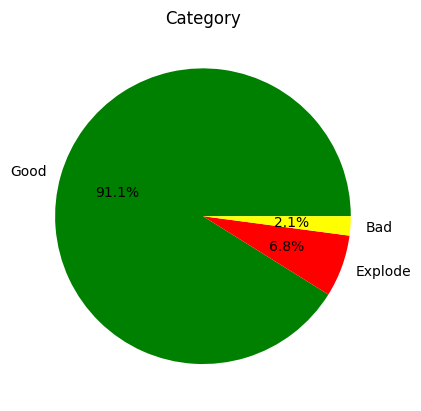

In [18]:
plt.pie(df['Category'].value_counts(),
        labels = ['Good','Explode', 'Bad'], 
        autopct = '%1.1f%%',
        colors = ['green','red','yellow'])
plt.title('Category')
plt.show()

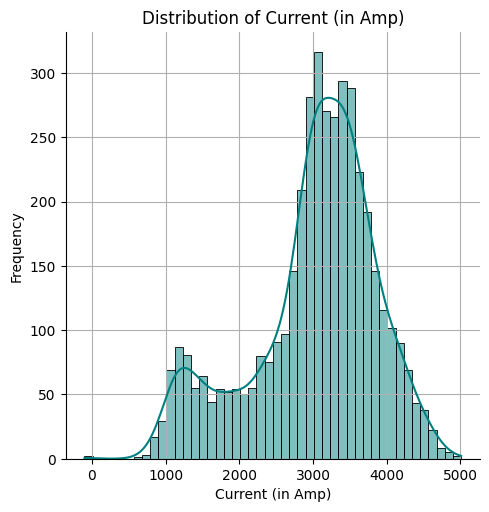

In [19]:
sns.displot(df['Current (A)'], kde=True, color='teal')
plt.title('Distribution of Current (in Amp)')
plt.xlabel('Current (in Amp)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bivariate Analysis

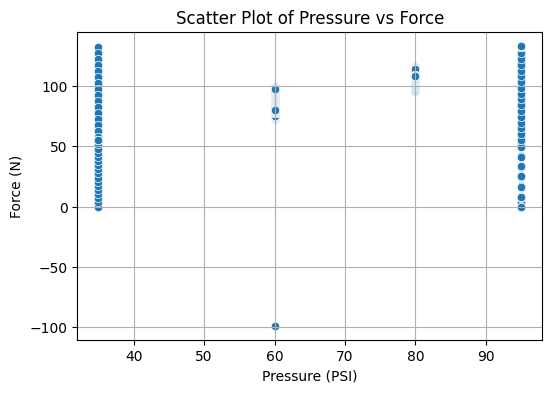

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Pressure (PSI)', y='Force (N)')
plt.title('Scatter Plot of Pressure vs Force')
plt.xlabel('Pressure (PSI)')
plt.ylabel('Force (N)')
plt.grid(True)
plt.show()

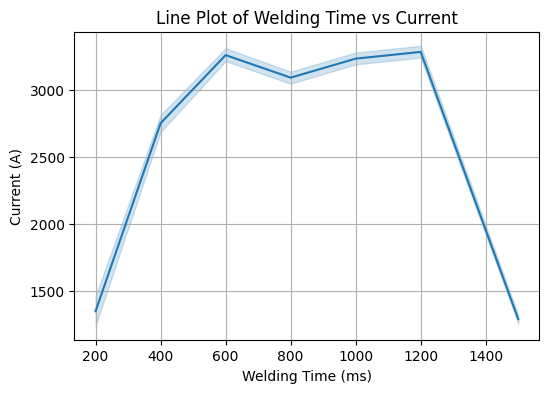

In [21]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Welding Time (ms)', y='Current (A)')
plt.title('Line Plot of Welding Time vs Current')
plt.xlabel('Welding Time (ms)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()

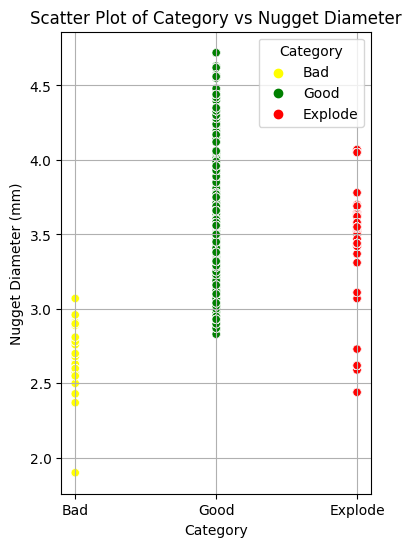

In [22]:
plt.figure(figsize=(4, 6))
colors = {'Good': 'green', 'Bad': 'yellow', 'Explode':'red'}
sns.scatterplot(data=df, x='Category', y='NuggetDiameter (mm)',hue='Category', palette=colors)
plt.title('Scatter Plot of Category vs Nugget Diameter')
plt.xlabel('Category')
plt.ylabel('Nugget Diameter (mm)')
plt.legend(title='Category', loc='upper right')
plt.grid(True)
plt.show()

# Multivariate Analysis

In [ ]:
# multivariate analysis
sns.pairplot(df)

In [ ]:
sns.heatmap(df.corr(), annot = True)

# Handling Outliers

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot to Identify Outliers')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

In [ ]:
# Define a function to replace outliers with column means using percentiles
def replace_outliers_with_mean_percentile(df, lower_percentile=5, upper_percentile=95):
    for column in df.select_dtypes(include='number').columns:
        # Calculate lower and upper percentiles
        lower_bound = np.percentile(df[column], lower_percentile)
        upper_bound = np.percentile(df[column], upper_percentile)
        
        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        # Replace outliers with column mean
        df.loc[outliers, column] = df[column].mean()

# Call the function to replace outliers with column means using percentiles
replace_outliers_with_mean_percentile(df)

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot to Identify Outliers')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

In [ ]:
Q1_pull = df['PullTest (N)'].quantile(0.25)
Q3_pull = df['PullTest (N)'].quantile(0.75)
IQR_pull = Q3_pull - Q1_pull
upper_bound_pull = Q1_pull + 1.5 * IQR_pull
outliers_lower_whisker_pull = df[df['PullTest (N)'] > upper_bound_pull]
df.loc[outliers_lower_whisker_pull.index, 'PullTest (N)'] = df['PullTest (N)'].mean()

In [ ]:
Q1_pull = df['Current (A)'].quantile(0.25)
Q3_pull = df['Current (A)'].quantile(0.75)
IQR_pull = Q3_pull - Q1_pull
lower_bound_pull = Q1_pull - 1.5 * IQR_pull
outliers_lower_whisker_pull = df[df['Current (A)'] < lower_bound_pull]
df.loc[outliers_lower_whisker_pull.index, 'Current (A)'] = df['Current (A)'].mean()

In [ ]:
Q1_pull = df['Current (A)'].quantile(0.25)
Q3_pull = df['Current (A)'].quantile(0.75)
IQR_pull = Q3_pull - Q1_pull
lower_bound_pull = Q1_pull - 1.5 * IQR_pull
outliers_lower_whisker_pull = df[df['Current (A)'] < lower_bound_pull]
df.loc[outliers_lower_whisker_pull.index, 'Current (A)'] = df['Current (A)'].mean()

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot to Identify Outliers')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

# X and y Split

In [ ]:
X = df.drop(columns = ['Category'], axis = 1)
y = df['Category']

In [ ]:
X.head()

In [ ]:
y.head()

# Data Scaling

In [ ]:
scale = MinMaxScaler() 
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)
X_scaled.head()

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Balancing the Dataset

In [ ]:
y_train.value_counts()

In [ ]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

# Model Building

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1

In [ ]:
y_pred_train1 = model1.predict(X_train)

In [ ]:
test_acc1 = accuracy_score(y_test, y_pred1)
train_acc1 = accuracy_score(y_train, y_pred_train1)
print('Testing Accuracy = ', test_acc1)
print('Training Accuracy = ', train_acc1)

In [ ]:
probability = model1.predict_proba(X_test)
roc_auc1 = roc_auc_score(y_test, probability, multi_class='ovr')
print("ROC AUC score:", roc_auc)

In [ ]:
pd.crosstab(y_test,y_pred1)

In [ ]:
# classification report
print(classification_report(y_test,y_pred1))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth = 4, splitter = 'best', criterion = 'entropy')
model2.fit(X_train, y_train)

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2

In [ ]:
y_pred_train2 = model2.predict(X_train)

In [ ]:
test_acc2 = accuracy_score(y_test, y_pred2)
train_acc2 = accuracy_score(y_train, y_pred_train2)
print('Testing Accuracy = ', test_acc2)
print('Training Accuracy = ', train_acc2)

In [ ]:
probability = model2.predict_proba(X_test)
roc_auc2 = roc_auc_score(y_test, probability, multi_class='ovr')
print("ROC AUC score:", roc_auc)

In [ ]:
pd.crosstab(y_test,y_pred2)

In [ ]:
# classification report
print(classification_report(y_test,y_pred2))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3

In [ ]:
y_pred_train3 = model3.predict(X_train)

In [ ]:
test_acc3 = accuracy_score(y_test, y_pred3)
train_acc3 = accuracy_score(y_train, y_pred_train3)
print('Testing Accuracy = ', test_acc3)
print('Training Accuracy = ', train_acc3)

In [ ]:
probability = model3.predict_proba(X_test)
roc_auc3 = roc_auc_score(y_test, probability, multi_class='ovr')
print("ROC AUC score:", roc_auc)

In [ ]:
pd.crosstab(y_test,y_pred3)

In [ ]:
# classification report
print(classification_report(y_test,y_pred3))

# SVC

In [ ]:
from sklearn.svm import SVC
model4 = SVC(probability=True)
model4.fit(X_train, y_train)

In [ ]:
y_pred4 = model4.predict(X_test)
y_pred4

In [ ]:
y_pred_train4 = model4.predict(X_train)

In [ ]:
test_acc4 = accuracy_score(y_test, y_pred4)
train_acc4 = accuracy_score(y_train, y_pred_train4)
print('Testing Accuracy = ', test_acc4)
print('Training Accuracy = ', train_acc4)

In [ ]:
probability = model4.predict_proba(X_test)
roc_auc4 = roc_auc_score(y_test, probability, multi_class='ovr')
print("ROC AUC score:", roc_auc)

In [ ]:
pd.crosstab(y_test,y_pred4)

In [ ]:
# classification report
print(classification_report(y_test,y_pred4))

# Selecting the best model

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
train_acc = [train_acc1, train_acc2, train_acc3, train_acc4]
test_acc = [test_acc1, test_acc2, test_acc3, test_acc4]
roc_auc = [roc_auc1, roc_auc2, roc_auc3, roc_auc4]

df_results = pd.DataFrame({
    'Model Name': model_names,
    'Training Accuracy': train_acc,
    'Testing Accuracy': test_acc,
    'ROC AUC Score': roc_auc
})

df_results

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot Training Accuracy
axs[0].bar(models, train_acc, color='skyblue')
axs[0].set_title('Training Accuracy')
axs[0].set_ylabel('Accuracy')

# Plot Testing Accuracy
axs[1].bar(models, test_acc, color='salmon')
axs[1].set_title('Testing Accuracy')
axs[1].set_ylabel('Accuracy')

# Plot ROC AUC Score
axs[2].bar(models, roc_auc, color='lightgreen')
axs[2].set_title('ROC AUC Score')
axs[2].set_ylabel('ROC AUC')

plt.tight_layout()
plt.show()

The Random Forest model is the best because it achieved perfect accuracy on the training data and near-perfect accuracy on the testing data, along with a perfect ROC AUC score. This indicates that the model generalizes well to unseen data and has effectively captured the patterns in the dataset without overfitting.

# Model Deployment

In [ ]:
import pickle
pickle.dump(model3,open('Precision_Welding_Optimization.pkl','wb'))
print('Pickle model downloaded successfully!!')

# Test the Model

In [ ]:
model3.predict(scale.transform([[35,200,0,0.00,1315.41,0.922,0.920,2127.7,2.63]]))

In [ ]:
model3.predict(scale.transform([[60,600,15,93.37,3637.78,0.622,3.501072,3097.6,3.43]]))